<img src="https://i1.sndcdn.com/avatars-000274765548-vj7h0w-t500x500.jpg" style='float:right; width:200px; margin: 0 20px;'>

<img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-11-512.png" style='float:right; width:200px; margin: 0 20px;'>


# Twitter V CMV topological differences --> CMV
---

> Create feature set for CMV and Twitter 

> Do comperative analysis of features

In [1]:
# env 
import sys
sys.path.append('/Users/shaimeital/code/thesis/conversant')

In [2]:
from conversant.conversation.examples.controversial_feature_extraction import *
from conversant.conversation.conversation_utils import conversation_to_dataframe

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

## Load Raw Data

In [5]:
trees_file_path = './trees_2.0.txt'
total_trees = sum(1 for _ in iter_trees_from_lines(trees_file_path))

print(f'loaded total of {total_trees}')

loaded total of 16306


## Transform to Conversation object and to feature set

In [19]:
trees = tqdm.tqdm(iter_trees_from_lines(trees_file_path), total=total_trees)

  0%|          | 0/16306 [00:00<?, ?it/s]

In [20]:
conv_reader = CMVConversationReader()
conversations = map(conv_reader.parse, trees)
sub_convs = (Conversation(child) for conv in conversations for child in conv.root.children)
sub_convs = filter(lambda c: c.size >= 5, sub_convs)
#features = map(get_features, sub_convs)

In [8]:
full_conversations = list(conversations)

100%|██████████| 16306/16306 [00:30<00:00, 529.87it/s] 


In [9]:
convs = pd.concat(conversation_to_dataframe(conv) for conv in full_conversations) 

In [10]:
convs.head()

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.text,...,data.extra_data.name,data.extra_data.ups,data.extra_data.mod_reason_by,data.extra_data.mod_reason_title,data.extra_data.mod_note,data.extra_data.author_cakeday,data.extra_data.send_replies,data.extra_data.no_follow,data.extra_data.crosspost_parent,data.extra_data.crosspost_parent_list
node_id,,,,,,,,,,,,,,,,,,,,,
6kn9gy,badparentthro,None,0,True,True,True,1498919337,6kn9gy,6kn9gy,[removed],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7f53sk,[deleted],None,0,True,True,False,1511499160,7f53sk,7f53sk,[deleted],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dq9kszi,Milskidasith,7f53sk,1,False,False,True,1511500750,7f53sk,7f53sk,I'm not going to argue that the economics and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dq9m8km,DangerousHarvey,7f53sk,1,False,False,False,1511503414,7f53sk,7f53sk,I'd argue that our political problems outweigh...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dq9mxr5,mergerr,dq9m8km,2,False,False,False,1511504807,7f53sk,7f53sk,So you're saying that our foreign occupation a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
roots = convs.loc[convs.is_root == True][['author', 'full_conv_id']]
roots

,author,full_conv_id
node_id,,
6kn9gy,badparentthro,6kn9gy
7f53sk,[deleted],7f53sk
6ozbfi,jbowmann,6ozbfi
7f30fw,TBSchemer,7f30fw
6g7ct0,benjomaga,6g7ct0
...,...,...
6p9ano,[deleted],6p9ano
7rnozm,belllaFour,7rnozm
7nkm66,[deleted],7nkm66


In [12]:
def conversattion_to_dataframe_filter_root(conv):
    conv = conversation_to_dataframe(conv)
    full_conv_id = conv.full_conv_id[:1].values[0]
    root_author_name = roots.loc[roots.full_conv_id == full_conv_id].author.values[0]
    return conv.loc[conv.author != root_author_name]

In [16]:
data_no_root = pd.concat(conversattion_to_dataframe_filter_root(conv) for conv in sub_convs) 

100%|██████████| 16306/16306 [03:46<00:00, 71.96it/s] 


In [21]:
data_with_root = pd.concat(conversation_to_dataframe(conv) for conv in sub_convs)

100%|██████████| 16306/16306 [02:17<00:00, 118.84it/s]


## EDA

### Mean branch participation for user in CMV
remove op and show that most users in a conversation only participaten in one branch

In [22]:
user_participation=pd.DataFrame(data_no_root.groupby(['author', 'full_conv_id'])['conversation_id'].nunique())\
                    .rename({'conversation_id': '#participation'}, axis=1)
user_participation.head()

#participation
author             full_conv_id                
----______-------- 4rr707                     1
---Kaiser          6312id                     1
                   65krso                     1
                   66x637                     1
                   6gvww8                     1

In [23]:
mean_branch_participation = pd.DataFrame(user_participation.groupby('author')['#participation'].mean()).\
                            rename({'#participation': 'mean_branch_participation'}, axis=1)
mean_branch_participation.head()

,mean_branch_participation
author,
----______--------,1.000000
---Kaiser,1.142857
--Aeo--,4.500000
--IIII--------IIII--,1.000000
--WhiteFang--,1.000000


In [36]:
bins = [0,1,2,3,4,72]

In [37]:
mean_branch_participation['mean_par_bin'] = pd.cut(mean_branch_participation.mean_branch_participation, bins=bins)

In [38]:
mean_branch_participation

,mean_branch_participation,mean_par_bin
author,,
----______--------,1.000000,"(0, 1]"
---Kaiser,1.142857,"(1, 2]"
--Aeo--,4.500000,"(4, 72]"
--IIII--------IIII--,1.000000,"(0, 1]"
--WhiteFang--,1.000000,"(0, 1]"
...,...,...
zzMojaveExpress,1.000000,"(0, 1]"
zzay,1.000000,"(0, 1]"
zzupdown,3.000000,"(2, 3]"


In [39]:
mean_branch_participation.describe()

,mean_branch_participation
count,34488.000000
mean,1.140942
std,0.453099
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,17.000000


In [40]:
bin_participation = mean_branch_participation.groupby('mean_par_bin').count()
bin_participation

,mean_branch_participation
mean_par_bin,
"(0, 1]",27515
"(1, 2]",6265
"(2, 3]",475
"(3, 4]",133
"(4, 72]",100


In [41]:
bin_participation = bin_participation.reset_index()
bin_participation

,mean_par_bin,mean_branch_participation
0,"(0, 1]",27515
1,"(1, 2]",6265
2,"(2, 3]",475
3,"(3, 4]",133
4,"(4, 72]",100


In [42]:
bin_participation.mean_branch_participation.sum()

34488

In [43]:
percen = bin_participation.mean_branch_participation.apply(lambda x: x / 34488)

In [44]:
bin_participation = bin_participation.assign(perc = percen)
bin_participation

,mean_par_bin,mean_branch_participation,perc
0,"(0, 1]",27515,0.797814
1,"(1, 2]",6265,0.181657
2,"(2, 3]",475,0.013773
3,"(3, 4]",133,0.003856
4,"(4, 72]",100,0.002900


Text(0.5, 0, 'mean participation bin')

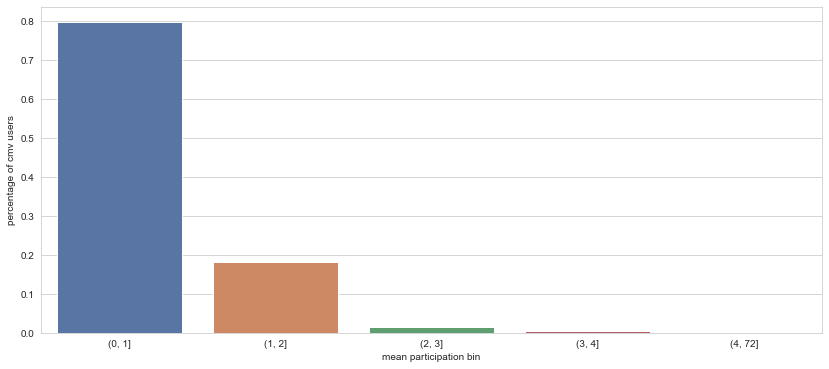

In [45]:
_, ax = plt.subplots(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.barplot(data=bin_participation, x = 'mean_par_bin', y= 'perc', palette="deep")
plt.ylabel('percentage of cmv users')
plt.xlabel('mean participation bin')

## Some Feature Extraction

In [47]:
# example of one branch 
conv = data_with_root.loc[data_with_root.conversation_id == 'do45haw']
conv

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.text,...,data.extra_data.subreddit,data.extra_data.parent_id,data.extra_data.link_id,data.extra_data.permalink,data.timestamp,data.extra_data.ups,data.extra_data.author_cakeday,data.extra_data.mod_reason_by,data.extra_data.mod_reason_title,data.extra_data.mod_note
node_id,,,,,,,,,,,,,,,,,,,,,
do45haw,kublahkoala,757z9m,1,True,False,False,1507543978,do45haw,757z9m,When you say your country's economic model may...,...,changemyview,t3_757z9m,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507543978,NaN,NaN,NaN,NaN,NaN
do46iht,nakamuchy,do45haw,2,False,False,False,1507546828,do45haw,757z9m,"Yes, I meant bias exists and could be in diffe...",...,changemyview,t1_do45haw,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507546828,NaN,NaN,NaN,NaN,NaN
do46wdu,jennysequa,do46iht,3,False,False,True,1507547802,do45haw,757z9m,"<quote> delibrate, ingrained and institutional...",...,changemyview,t1_do46iht,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507547802,NaN,NaN,NaN,NaN,NaN
do4gm4t,fps916,do46iht,3,False,False,False,1507562627,do45haw,757z9m,Aside from the question of whether or not syst...,...,changemyview,t1_do46iht,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507562627,NaN,NaN,NaN,NaN,NaN
do4kz9f,nakamuchy,do4gm4t,4,False,False,False,1507567320,do45haw,757z9m,<quote>Now these are just the points relating ...,...,changemyview,t1_do4gm4t,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507567320,NaN,NaN,NaN,NaN,NaN
do4l47r,fps916,do4kz9f,5,False,False,True,1507567463,do45haw,757z9m,<quote> more related to questionable police pr...,...,changemyview,t1_do4kz9f,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507567463,NaN,NaN,NaN,NaN,NaN
do4z4n4,garnet420,do4kz9f,5,False,False,True,1507581792,do45haw,757z9m,"So, besides not addressing most of the argumen...",...,changemyview,t1_do4kz9f,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507581792,NaN,NaN,NaN,NaN,NaN
do4h38y,fps916,do46iht,3,False,False,False,1507563154,do45haw,757z9m,How far removed do you think we (as a society)...,...,changemyview,t1_do46iht,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507563154,NaN,NaN,NaN,NaN,NaN
do4lnmf,nakamuchy,do4h38y,4,False,False,False,1507568010,do45haw,757z9m,In so far as laws are a set of agreement betwe...,...,changemyview,t1_do4h38y,t3_757z9m,/r/changemyview/comments/757z9m/cmv_there_is_n...,1507568010,NaN,NaN,NaN,NaN,NaN


In [68]:
def count_op_involvment(subconv:pd.DataFrame, roots:pd.DataFrame) -> float:
    """
    counts the proportion of posts from the full conversation author in the subconversation
    """
    full_conversation_id = subconv.sample(1).full_conv_id.values[0]
    op = roots[roots.full_conv_id == full_conversation_id].author.values[0]
    return len(subconv[subconv.author == op]) / len(subconv)

In [69]:
count_op_involvment(conv, roots)

0.25

In [70]:
# max branch depth 
def max_branch_depth(conv:pd.DataFrame) -> int:
    return conv.depth.max()

In [71]:
max_branch_depth(conv)

7

In [72]:
# apply two features to all of the sub-conversations 
op_involvment = data_with_root.groupby('conversation_id').apply(lambda x: count_op_involvment(x, roots))
op_involvment

conversation_id
d4uqme9    0.076923
d4uqnbx    0.333333
d4uritg    0.400000
d4urtkd    0.200000
d4utgsf    0.166667
             ...   
duigfd7    0.500000
duii4ub    0.000000
duii8gq    0.428571
duij4vs    0.600000
duil57m    0.000000
Length: 32014, dtype: float64

In [73]:
op_involvment_ = pd.DataFrame(op_involvment).rename({0:'op_involvment'}, axis=1)
op_involvment_

,op_involvment
conversation_id,
d4uqme9,0.076923
d4uqnbx,0.333333
d4uritg,0.400000
d4urtkd,0.200000
d4utgsf,0.166667
...,...
duigfd7,0.500000
duii4ub,0.000000
duii8gq,0.428571


In [74]:
sub_conv_feature_set = data_with_root.merge(op_involvment_, how='left', on = 'conversation_id')
sub_conv_feature_set.head()

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.text,...,data.extra_data.parent_id,data.extra_data.link_id,data.extra_data.permalink,data.timestamp,data.extra_data.ups,data.extra_data.author_cakeday,data.extra_data.mod_reason_by,data.extra_data.mod_reason_title,data.extra_data.mod_note,op_involvment
0,Bodoblock,7f30fw,1,True,False,False,1511477207,dq95b41,7f30fw,"Bitcoin gets hyped all the time here, and it's...",...,t3_7f30fw,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511477207,NaN,NaN,NaN,NaN,NaN,0.3
1,Pavikold,dq95b41,2,False,False,False,1511477803,dq95b41,7f30fw,I came here to say that. I was introduced to B...,...,t1_dq95b41,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511477803,NaN,NaN,NaN,NaN,NaN,0.3
2,TBSchemer,dq95qp4,3,False,False,False,1511544669,dq95b41,7f30fw,But will that continue? What reason do you hav...,...,t1_dq95qp4,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511544669,NaN,NaN,NaN,NaN,NaN,0.3
3,Pavikold,dqa6nxr,4,False,False,False,1511549168,dq95b41,7f30fw,"My understanding of bitcoin is limited, but fr...",...,t1_dqa6nxr,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511549168,NaN,NaN,NaN,NaN,NaN,0.3
4,Dopecheez-,dqaaaec,5,False,False,True,1511567849,dq95b41,7f30fw,Why would anyone spend a currency that constan...,...,t1_dqaaaec,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511567849,NaN,NaN,NaN,NaN,NaN,0.3


In [75]:
max_depths = data_with_root.groupby('conversation_id').apply(lambda x: max_branch_depth(x))
max_depths

conversation_id
d4uqme9    11
d4uqnbx     4
d4uritg     5
d4urtkd     4
d4utgsf     4
           ..
duigfd7    16
duii4ub     4
duii8gq     7
duij4vs     4
duil57m     5
Length: 32014, dtype: int64

In [76]:
max_depths_ = pd.DataFrame(max_depths).rename({0:'max_depth'}, axis=1)
max_depths_

,max_depth
conversation_id,
d4uqme9,11
d4uqnbx,4
d4uritg,5
d4urtkd,4
d4utgsf,4
...,...
duigfd7,16
duii4ub,4
duii8gq,7


In [77]:
sub_conv_feature_set = sub_conv_feature_set.merge(max_depths_, how='left', on = 'conversation_id')
sub_conv_feature_set.head()

,author,parent_id,depth,is_root,is_absolute_root,is_leaf,timestamp,conversation_id,full_conv_id,data.text,...,data.extra_data.link_id,data.extra_data.permalink,data.timestamp,data.extra_data.ups,data.extra_data.author_cakeday,data.extra_data.mod_reason_by,data.extra_data.mod_reason_title,data.extra_data.mod_note,op_involvment,max_depth
0,Bodoblock,7f30fw,1,True,False,False,1511477207,dq95b41,7f30fw,"Bitcoin gets hyped all the time here, and it's...",...,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511477207,NaN,NaN,NaN,NaN,NaN,0.3,5
1,Pavikold,dq95b41,2,False,False,False,1511477803,dq95b41,7f30fw,I came here to say that. I was introduced to B...,...,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511477803,NaN,NaN,NaN,NaN,NaN,0.3,5
2,TBSchemer,dq95qp4,3,False,False,False,1511544669,dq95b41,7f30fw,But will that continue? What reason do you hav...,...,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511544669,NaN,NaN,NaN,NaN,NaN,0.3,5
3,Pavikold,dqa6nxr,4,False,False,False,1511549168,dq95b41,7f30fw,"My understanding of bitcoin is limited, but fr...",...,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511549168,NaN,NaN,NaN,NaN,NaN,0.3,5
4,Dopecheez-,dqaaaec,5,False,False,True,1511567849,dq95b41,7f30fw,Why would anyone spend a currency that constan...,...,t3_7f30fw,/r/changemyview/comments/7f30fw/cmv_once_an_in...,1511567849,NaN,NaN,NaN,NaN,NaN,0.3,5


In [79]:
sub_conv_feature_set.op_involvment.describe()

count    518213.000000
mean          0.186908
std           0.168569
min           0.000000
25%           0.030303
50%           0.142857
75%           0.333333
max           1.000000
Name: op_involvment, dtype: float64

In [78]:
sub_conv_feature_set.to_csv('cmv_branches_2features.csv')

In [ ]:
# data = pd.DataFrame.from_records(features, index="conv_id")
# print(data.head())

In [ ]:
data_ = data.loc[data.num_nodes > 10]

In [ ]:
data_.count()

In [ ]:
data_

In [ ]:
data_.describe()

In [ ]:
data_ = data_.fillna(0)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [ ]:
standardized_data = StandardScaler().fit_transform(data_)
print(standardized_data.shape)

In [ ]:
model = TSNE(n_components=2, random_state=0)

In [ ]:
tsne_data = model.fit_transform(standardized_data)

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.FacetGrid(tsne_df, height=9).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
m = DBSCAN()


In [ ]:
m.fit(standardized_data)

In [ ]:
clusters = m.labels_

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
# pca

from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)


In [ ]:
principalComponents = pca.fit_transform(standardized_data)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
sns.FacetGrid(principalDf, height=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()